<a href="https://colab.research.google.com/github/abhinag007/Stock-Money-MLM/blob/master/Stock_Predict_trading_Forex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import pandas_datareader.data as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import time
plt.style.use('fivethirtyeight') 

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [ ]:
pip install alpha_vantage

     |████████████████████████████████| 1.2MB 4.1MB/s 
     |████████████████████████████████| 266kB 17.9MB/s 
     |████████████████████████████████| 153kB 18.6MB/s 
  Created wheel for alpha-vantage: filename=alpha_vantage-2.2.0-cp36-none-any.whl size=25706 sha256=6baced859c7dbbf16cda731f1536cf606cc3336bb3b50f8eee68c0543661eaec
  Stored in directory: /root/.cache/pip/wheels/3a/fa/05/80b0afcbd2a4de8bd2a0c5cd77084e3d3a9cc12c48be9b7f84
  Created wheel for idna-ssl: filename=idna_ssl-1.1.0-cp36-none-any.whl size=3161 sha256=c3e4d5ebe8e286100f8fc413217f611a8ce972135dac230dab1dc58899d97568
  Stored in directory: /root/.cache/pip/wheels/d3/00/b3/32d613e19e08a739751dd6bf998cfed277728f8b2127ad4eb7
Successfully built alpha-vantage idna-ssl


In [ ]:
api_key = 'TH6MZ4PJ9YRP8HNX'

In [ ]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
import time
import matplotlib.pyplot as plt
from alpha_vantage.foreignexchange import ForeignExchange
from alpha_vantage.cryptocurrencies import CryptoCurrencies

In [ ]:
# cc = CryptoCurrencies(key = api_key, output_format = 'pandas')
# df, meta_data = cc.CryptoCurrencies(from_currency='USD',to_currency="BTC")
# print(df)

In [ ]:
cc = ForeignExchange(key = api_key, output_format = 'pandas')
df, meta_data = cc.get_currency_exchange_intraday(from_symbol='EUR', to_symbol='USD',interval='1min',outputsize='full')
print(df)

                     1. open  2. high  3. low  4. close
date                                                   
2020-09-07 14:33:00   1.1825   1.1825  1.1824    1.1824
2020-09-07 14:32:00   1.1825   1.1826  1.1823    1.1825
2020-09-07 14:31:00   1.1825   1.1825  1.1823    1.1824
2020-09-07 14:30:00   1.1825   1.1826  1.1822    1.1824
2020-09-07 14:29:00   1.1825   1.1826  1.1823    1.1825
...                      ...      ...     ...       ...
2020-09-06 19:44:00   1.1839   1.1839  1.1839    1.1839
2020-09-06 19:43:00   1.1839   1.1839  1.1839    1.1839
2020-09-06 19:42:00   1.1839   1.1839  1.1839    1.1839
2020-09-06 19:41:00   1.1839   1.1839  1.1839    1.1839
2020-09-06 19:40:00   1.1839   1.1839  1.1839    1.1839

[1134 rows x 4 columns]


In [ ]:
df = df[::-1]
df

,1. open,2. high,3. low,4. close
date,,,,
2020-09-06 19:40:00,1.1839,1.1839,1.1839,1.1839
2020-09-06 19:41:00,1.1839,1.1839,1.1839,1.1839
2020-09-06 19:42:00,1.1839,1.1839,1.1839,1.1839
2020-09-06 19:43:00,1.1839,1.1839,1.1839,1.1839
2020-09-06 19:44:00,1.1839,1.1839,1.1839,1.1839
...,...,...,...,...
2020-09-07 14:29:00,1.1825,1.1826,1.1823,1.1825
2020-09-07 14:30:00,1.1825,1.1826,1.1822,1.1824
2020-09-07 14:31:00,1.1825,1.1825,1.1823,1.1824


In [ ]:
#Get the stock quote
# df = web.DataReader('TATAMOTORS.NS', data_source='yahoo',start = '2020-01-25', end = date.today())

In [ ]:
df

,1. open,2. high,3. low,4. close
date,,,,
2020-09-06 19:40:00,1.1839,1.1839,1.1839,1.1839
2020-09-06 19:41:00,1.1839,1.1839,1.1839,1.1839
2020-09-06 19:42:00,1.1839,1.1839,1.1839,1.1839
2020-09-06 19:43:00,1.1839,1.1839,1.1839,1.1839
2020-09-06 19:44:00,1.1839,1.1839,1.1839,1.1839
...,...,...,...,...
2020-09-07 14:29:00,1.1825,1.1826,1.1823,1.1825
2020-09-07 14:30:00,1.1825,1.1826,1.1822,1.1824
2020-09-07 14:31:00,1.1825,1.1825,1.1823,1.1824


In [ ]:
#show the data
df['Date'] = df.index

In [ ]:
df

,1. open,2. high,3. low,4. close,Date
date,,,,,
2020-09-06 19:40:00,1.1839,1.1839,1.1839,1.1839,2020-09-06 19:40:00
2020-09-06 19:41:00,1.1839,1.1839,1.1839,1.1839,2020-09-06 19:41:00
2020-09-06 19:42:00,1.1839,1.1839,1.1839,1.1839,2020-09-06 19:42:00
2020-09-06 19:43:00,1.1839,1.1839,1.1839,1.1839,2020-09-06 19:43:00
2020-09-06 19:44:00,1.1839,1.1839,1.1839,1.1839,2020-09-06 19:44:00
...,...,...,...,...,...
2020-09-07 14:29:00,1.1825,1.1826,1.1823,1.1825,2020-09-07 14:29:00
2020-09-07 14:30:00,1.1825,1.1826,1.1822,1.1824,2020-09-07 14:30:00
2020-09-07 14:31:00,1.1825,1.1825,1.1823,1.1824,2020-09-07 14:31:00


In [ ]:
#Get number of rows and colomns in datasets
df.shape

(1134, 5)

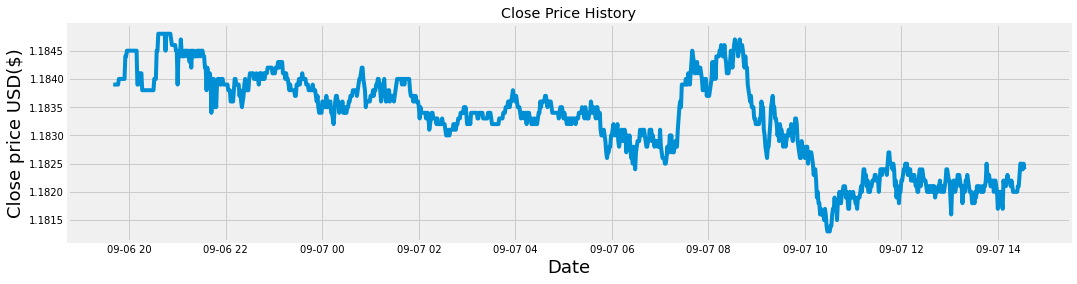

In [ ]:
# Close price history
plt.figure(figsize=(16,4))
plt.title('Close Price History')
plt.plot(df['4. close'],);
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD($)', fontsize = 18)
plt.show()

In [ ]:
# Create new dataframe with only close coloumn
data = df.filter(['4. close'])
# Convert dataframe to numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * 0.90)

training_data_len

1021

In [ ]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.74285714],
       [0.74285714],
       [0.74285714],
       ...,
       [0.31428571],
       [0.34285714],
       [0.31428571]])

In [ ]:
# Create training datasets
# Create the scaled training datasets
train_data = scaled_data[0:training_data_len,:]
# Slit x_train and y_train datasets
x_train = []
y_train = []
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print() 

[array([0.74285714, 0.74285714, 0.74285714, 0.74285714, 0.74285714,
       0.74285714, 0.74285714, 0.77142857, 0.77142857, 0.77142857,
       0.77142857, 0.77142857, 0.77142857, 0.77142857, 0.77142857,
       0.88571429, 0.88571429, 0.91428571, 0.91428571, 0.91428571,
       0.91428571, 0.91428571, 0.91428571, 0.91428571, 0.91428571,
       0.91428571, 0.91428571, 0.91428571, 0.91428571, 0.91428571,
       0.74285714, 0.74285714, 0.8       , 0.8       , 0.8       ,
       0.8       , 0.71428571, 0.71428571, 0.71428571, 0.71428571,
       0.71428571, 0.71428571, 0.71428571, 0.71428571, 0.71428571,
       0.71428571, 0.71428571, 0.71428571, 0.71428571, 0.71428571,
       0.71428571, 0.77142857, 0.77142857, 0.77142857, 0.91428571,
       0.91428571, 1.        , 1.        , 1.        , 1.        ])]
[1.0]



In [ ]:
# convert x_train y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))
x_train.shape

(961, 60, 1)

In [ ]:
# Build LSTM Model
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [ ]:
model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(x_train,y_train,batch_size=1, epochs = 1)

961/961 [==============================] - 20s 21ms/step - loss: 0.0058


In [ ]:
# Crete testing datasets
# Create a new array containing scaled value from index 1704 to 2130
test_data = scaled_data[training_data_len-60: ,:]
# Create dataset x_test, y_test 
x_test = []
y_test = dataset[training_data_len: ,:]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
x_test = np.array(x_test)

In [ ]:
# Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
# x_test = range(10)

In [ ]:
# Get model prediction price value
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

5.4634944949593805e-05

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


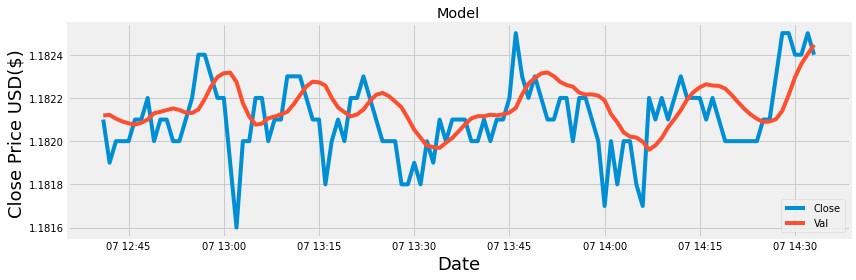

In [ ]:
# PLot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(12,4))
plt.title("Model")
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD($) ', fontsize=18)
# plt.plot(train['4. close'])
plt.plot(valid[['4. close', 'Predictions']])
plt.legend(['Close','Val','Predictions'],loc = 'lower right')
plt.tight_layout()
plt.show()

In [ ]:
valid.tail(60)

,4. close,Predictions
date,,
2020-09-07 13:34:00,1.1821,1.181969
2020-09-07 13:35:00,1.1820,1.181993
2020-09-07 13:36:00,1.1821,1.182015
2020-09-07 13:37:00,1.1821,1.182046
2020-09-07 13:38:00,1.1821,1.182077
2020-09-07 13:39:00,1.1820,1.182105
2020-09-07 13:40:00,1.1820,1.182115
2020-09-07 13:41:00,1.1821,1.182115
2020-09-07 13:42:00,1.1820,1.182122


In [ ]:
# Get the quote
# apple_quote = web.DataReader('TATAMOTORS.NS',data_source='yahoo',start='2012-01-01',end='2020-06-22')
apple_quote, meta_data = cc.get_currency_exchange_intraday(from_symbol='EUR', to_symbol='USD',interval='5min',outputsize='full')
apple_quote = apple_quote[::-1]
# Create new dataframe
new_df = apple_quote.filter(items=['4. close'])
# Get the last 60 days closing price and convert to numpy array
last_60_days = new_df[-60:].values
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# Create an empty list
X_test = []
# Append the past 60 days
X_test.append(last_60_days_scaled)

# Convert the X_test dataset to numpy array
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
# Get Predicted scaled price
pred_price = model.predict(X_test)
# undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)
print(new_df['4. close'][-1])
if pred_price > new_df['4. close'][-1]:
  print("BUY")
elif pred_price < new_df['4. close'][-1]:
  print("Sell")
else:
  print ("Dont buy or sell")

[[1.1822715]]
1.1825
Sell


In [ ]:
new, meta_data = cc.get_currency_exchange_intraday(from_symbol='EUR', to_symbol='USD',interval='5min',outputsize='full')
new = new[::-1]
print(new['4. close'].tail(10))

date
2020-09-07 13:45:00    1.1823
2020-09-07 13:50:00    1.1822
2020-09-07 13:55:00    1.1820
2020-09-07 14:00:00    1.1820
2020-09-07 14:05:00    1.1822
2020-09-07 14:10:00    1.1822
2020-09-07 14:15:00    1.1820
2020-09-07 14:20:00    1.1820
2020-09-07 14:25:00    1.1825
2020-09-07 14:30:00    1.1825
Name: 4. close, dtype: float64


In [ ]:
# pred_price = np.reshape(pred_price,1)
# lst_2 = np.reshape(lst_2,60)
# lst_2 = np.append(lst_2,pred_price)
# lst_2 = lst_2[1:]
# lst_2=np.reshape(lst_2,(1,60,1))
# pred_price = model.predict(lst_2)
# pred_price = scaler.inverse_transform(pred_price)
# print(pred_price)
# pred_price = scaler.transform(pred_price)